In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ipl_ball_by_ball = pd.read_csv('./IPL_Ball_by_Ball_2008_2022.csv')

In [3]:
ipl_matches = pd.read_csv('./IPL_Matches_2008_2022.csv')

In [4]:
batting_stats = pd.read_csv('./batsmen_stats.csv', index_col=0)
bowling_stats = pd.read_csv('./bowling_stats.csv', index_col=0)

Total runs scored by venues

In [5]:
ipl_matches['Venue'].unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'MA Chidambaram Stadium',
       'Punjab Cricket Association IS Bindra Stadium', 'Wankhede Stadium',
       'M.Chinnaswamy Stadium', 'Arun Jaitley Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium',
       'Maharashtra Cricket Association Stadium',
       'Holkar Cricket Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'M Chinnaswamy Stadium', 'Feroz Shah Kotla', 'Green Park',
       'Punjab Cricket A

In [6]:
ipl_matches['Venue'] = ipl_matches['Venue'].str.split(",").str[0]

In [7]:
ipl_matches.loc[ipl_matches["Venue"] == "Subrata Roy Sahara Stadium", "Venue"] = "Maharashtra Cricket Association Stadium"
ipl_matches.loc[ipl_matches["Venue"] == "Sardar Patel Stadium", "Venue"] = "Narendra Modi Stadium"
ipl_matches.loc[ipl_matches["Venue"] == "Sheikh Zayed Stadium", "Venue"] = "Zayed Cricket Stadium"
ipl_matches.loc[ipl_matches["Venue"] == "Punjab Cricket Association Stadium", "Venue"] = "Punjab Cricket Association IS Bindra Stadium"
ipl_matches.loc[ipl_matches["Venue"] == "M Chinnaswamy Stadium", "Venue"] = "M.Chinnaswamy Stadium"
ipl_matches.loc[ipl_matches["Venue"] == "Feroz Shah Kotla", "Venue"] = "Arun Jaitley Stadium"



In [8]:
name = "Arun Jaitley Stadium"
ipl_matches[ipl_matches['Venue'] == name]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
106,1254085,Delhi,2021-05-02,2021,28,Rajasthan Royals,Sunrisers Hyderabad,Arun Jaitley Stadium,Sunrisers Hyderabad,field,N,Rajasthan Royals,Runs,55.0,NaN,JC Buttler,"['JC Buttler', 'YBK Jaiswal', 'SV Samson', 'R ...","['MK Pandey', 'JM Bairstow', 'KS Williamson', ...",C Shamshuddin,CB Gaffaney
107,1254084,Delhi,2021-05-01,2021,27,Chennai Super Kings,Mumbai Indians,Arun Jaitley Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,4.0,NaN,KA Pollard,"['RD Gaikwad', 'F du Plessis', 'MM Ali', 'SK R...","['Q de Kock', 'RG Sharma', 'SA Yadav', 'KH Pan...",KN Ananthapadmanabhan,CK Nandan
110,1254081,Delhi,2021-04-29,2021,24,Rajasthan Royals,Mumbai Indians,Arun Jaitley Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,7.0,NaN,Q de Kock,"['JC Buttler', 'YBK Jaiswal', 'SV Samson', 'S ...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'KH Pan...",CB Gaffaney,KN Ananthapadmanabhan
111,1254080,Delhi,2021-04-28,2021,23,Sunrisers Hyderabad,Chennai Super Kings,Arun Jaitley Stadium,Sunrisers Hyderabad,bat,N,Chennai Super Kings,Wickets,7.0,NaN,RD Gaikwad,"['DA Warner', 'JM Bairstow', 'MK Pandey', 'KS ...","['RD Gaikwad', 'F du Plessis', 'MM Ali', 'RA J...",C Shamshuddin,CK Nandan
201,1178428,Delhi,2019-05-04,2019,53,Rajasthan Royals,Delhi Capitals,Arun Jaitley Stadium,Rajasthan Royals,bat,N,Delhi Capitals,Wickets,5.0,NaN,A Mishra,"['AM Rahane', 'LS Livingstone', 'SV Samson', '...","['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",AY Dandekar,IJ Gould
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,336022,Delhi,2008-05-17,2007/08,40,Delhi Daredevils,Kings XI Punjab,Arun Jaitley Stadium,Delhi Daredevils,bat,N,Kings XI Punjab,Runs,6.0,D/L,DPMD Jayawardene,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'TM Dils...","['SE Marsh', 'JR Hopes', 'Yuvraj Singh', 'LA P...",AV Jayaprakash,RE Koertzen
913,336020,Delhi,2008-05-15,2007/08,37,Delhi Daredevils,Deccan Chargers,Arun Jaitley Stadium,Deccan Chargers,field,N,Delhi Daredevils,Runs,12.0,NaN,A Mishra,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MF Maha...","['AC Gilchrist', 'Shahid Afridi', 'HH Gibbs', ...",BG Jerling,GA Pratapkumar
921,336009,Delhi,2008-05-08,2007/08,28,Delhi Daredevils,Chennai Super Kings,Arun Jaitley Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,MS Dhoni,"['G Gambhir', 'V Sehwag', 'AB de Villiers', 'S...","['S Vidyut', 'SP Fleming', 'MS Dhoni', 'SK Rai...",Aleem Dar,RB Tiffin
933,335998,Delhi,2008-04-30,2007/08,17,Delhi Daredevils,Royal Challengers Bangalore,Arun Jaitley Stadium,Royal Challengers Bangalore,field,N,Delhi Daredevils,Runs,10.0,NaN,GD McGrath,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'Shoaib ...","['P Kumar', 'W Jaffer', 'LRPL Taylor', 'JH Kal...",Aleem Dar,I Shivram


In [9]:
# pd.Series(ipl_matches['Venue'].unique()).to_csv('out.csv')
ipl_matches['Venue'].unique().shape

(33,)

In [14]:
ipl_bb_venue_df = pd.merge(ipl_ball_by_ball.set_index('ID'), ipl_matches.set_index('ID')[['Venue']], how='inner',
         left_index=True, right_index=True)

In [39]:
ipl_bb_venue_df.reset_index().groupby('ID')

In [97]:
total_runs = ipl_ball_by_ball[ipl_ball_by_ball['innings'].isin([1, 2])].groupby('ID')['total_run'].sum().rename('total_runs').to_frame()
total_runs_mrg_venue = total_runs.merge(ipl_matches.set_index('ID')[['Venue']], how='inner', left_index=True, right_index=True).reset_index()
total_runs_mrg_venue = total_runs_mrg_venue.groupby('Venue').agg({"total_runs":"sum", "ID": "count"}).rename(columns={'ID':"matches_played"})

In [123]:
top15_venues_played = total_runs_mrg_venue.nlargest(15, 'matches_played')

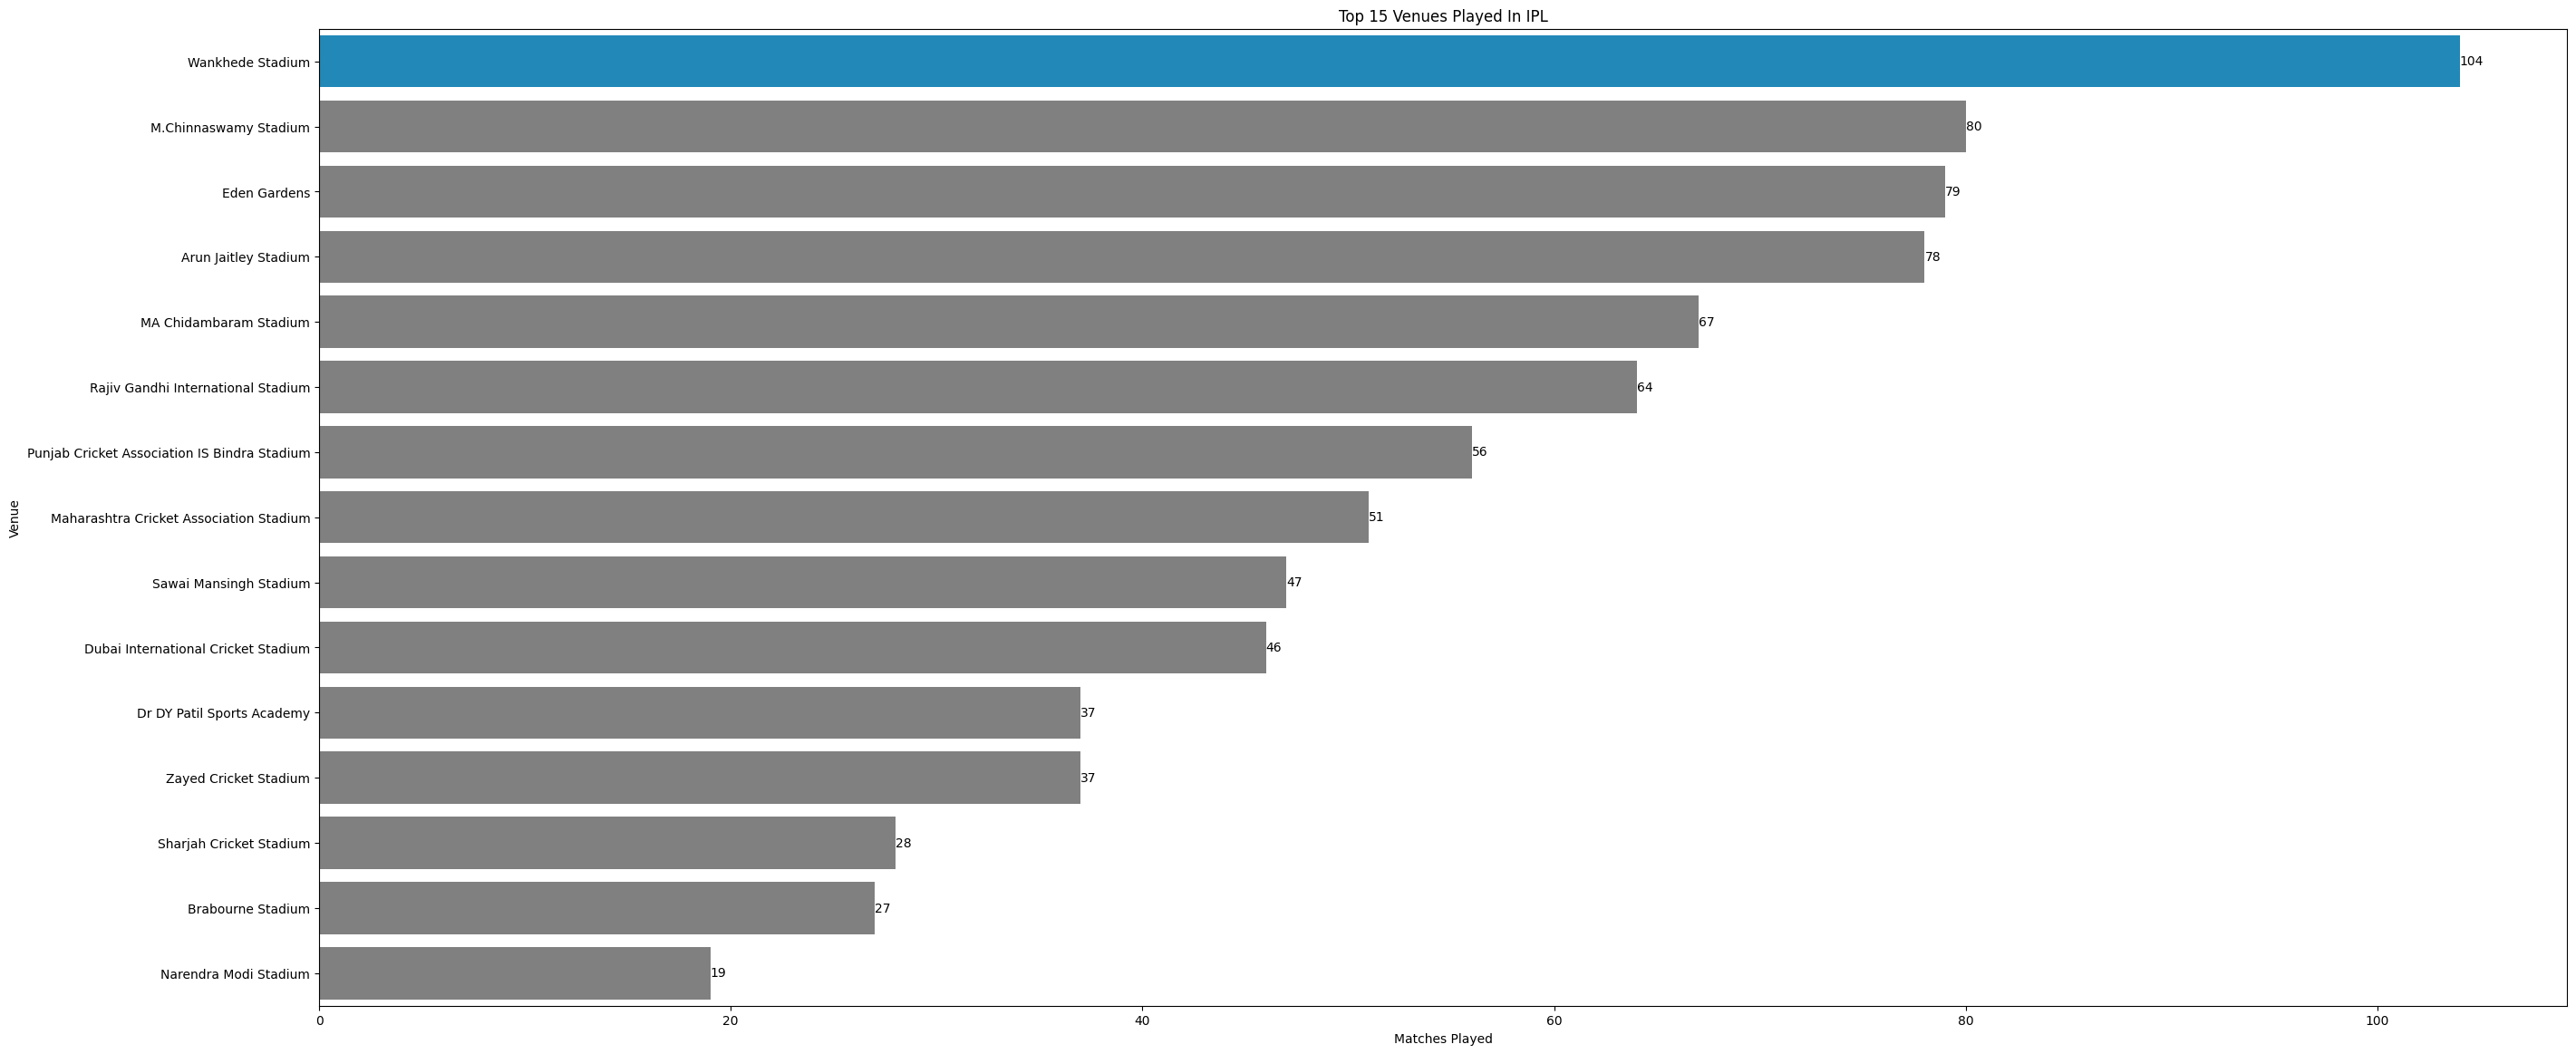

In [158]:
plt.figure(figsize=(32, 14))
clrs = ['grey' if (val < top15_venues_played['matches_played'].max()) else '#0892d0' for val in top15_venues_played['matches_played'] ]
ax = sns.barplot(data=top15_venues_played.reset_index(), x='matches_played', y='Venue', orient='h', palette=clrs)
plt.title('Top 15 Venues Played In IPL');
ax.bar_label(ax.containers[0]);
# plt.ylim(0, 100)
plt.xlabel('Matches Played');

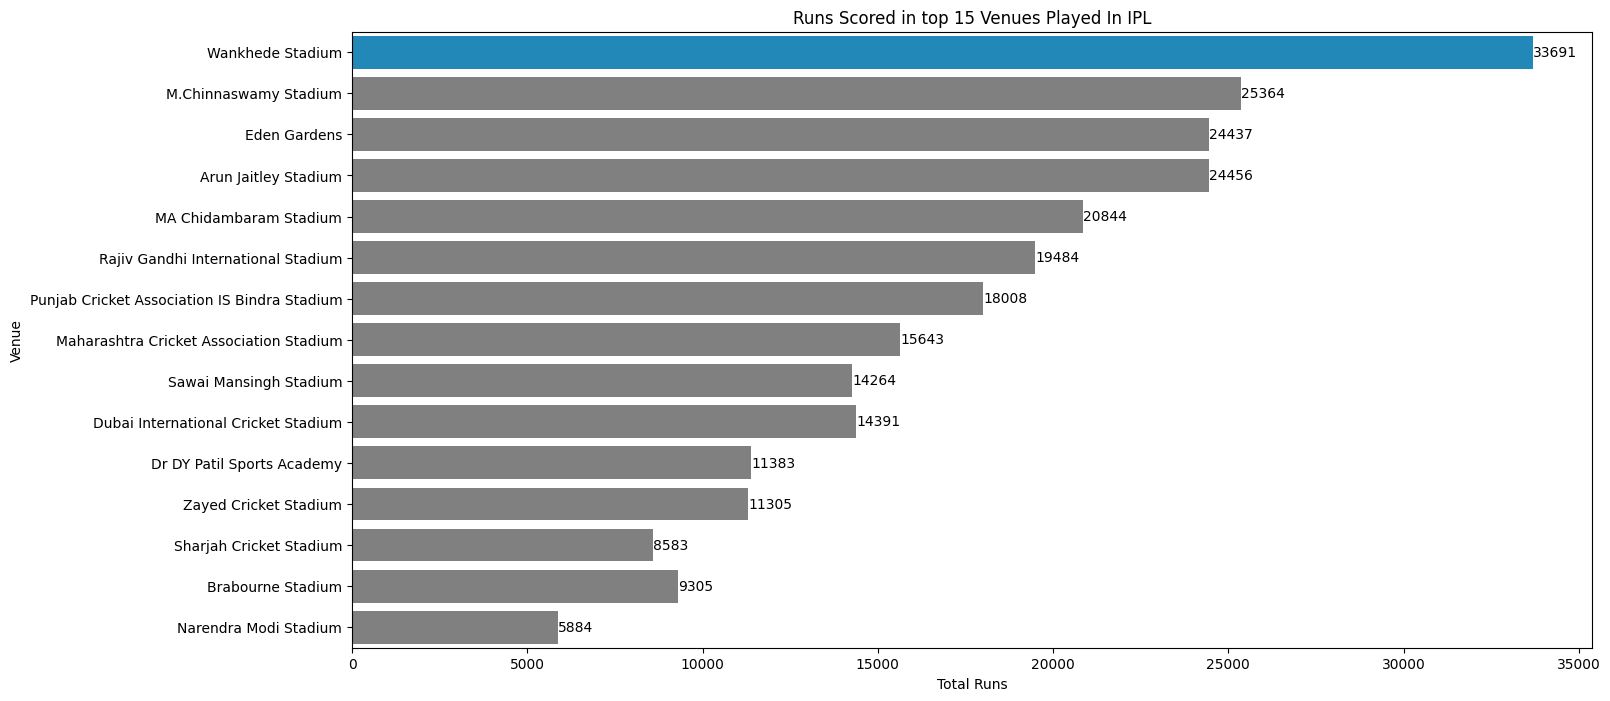

In [142]:
plt.figure(figsize=(16, 8))
clrs = ['grey' if (val < top15_venues_played['total_runs'].max()) else '#0892d0' for val in top15_venues_played['total_runs'] ]
ax = sns.barplot(data=top15_venues_played.reset_index(), x='total_runs', y='Venue', orient='h', palette=clrs)
plt.title('Runs Scored in top 15 Venues Played In IPL');
ax.bar_label(ax.containers[0]);
# plt.ylim(0, 100)
plt.xlabel('Total Runs');

In [96]:
# ipl_matches[ipl_matches['method']]

In [ ]:
# ipl finals semis hosted in hometowns